In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- matplotlib provides the raw building blocks for Seaborn visualization
- Pandas also support basic plotting capability
- Seaborn vs Pandas
    - Seaborn: 
        - Automatic lable on x axis
        - Muted color palette
        - Kernel Density Estimate (KDE) plot: The KDE helps to smooth the distribution and is a useful way to look at the data. 
        - Narrow bins
    - Pandas: 
        - Actual frequency of observations
        - No automatic labels 
        - Wide bins

## Rug plot and kde shading

In [ ]:
"""
# Univariate distribution analysis
1. Create a distplot of the Award_Amount column in the df
2. Configure it to show a shaded kde (using the kde_kws dictionary)
3. Add a rug plot above the x axis.
4. Display the plot
"""

sns.distplot(df['Award_Amount'],
             hist=False,
             rug=True,
             kde_kws={'shade':True})

# Plot the results
plt.show()

## Introduction to regplot
- The regplot function generates a scatter plot with a regression line
- Usage is similar to the distplot
- The data and x and y variables must be defined

In [3]:
## Data source: https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
df = pd.read_csv("data/winequality-red.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


<AxesSubplot:xlabel='alcohol', ylabel='pH'>

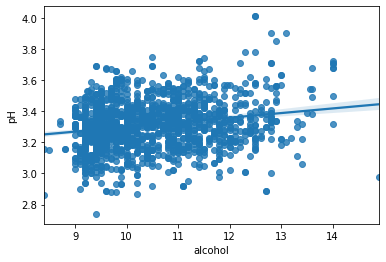

In [4]:
sns.regplot(x = 'alcohol', y = 'pH', data = df)

## Implot() builds on top of the base regplot()

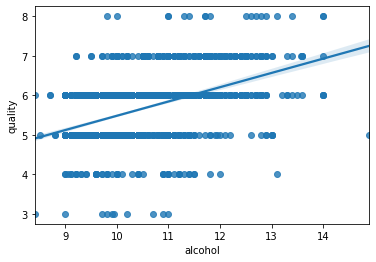

In [7]:
sns.regplot(x = 'alcohol',
            y = 'quality',
            data = df)
plt.show()

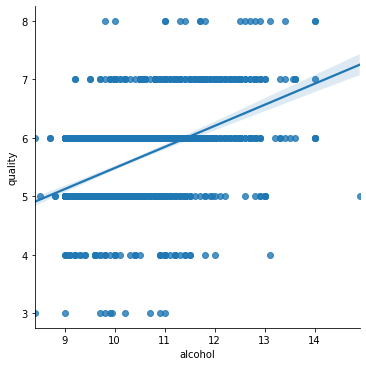

In [8]:
sns.lmplot(x = 'alcohol',
            y = 'quality',
            data = df)
plt.show()

## Implot faceting

In [ ]:
# Organize data by colors (hue)
sns.lmplot(x = 'quality',
           y = 'alcohol',
           data = df,
           hue = 'type')
plt.show()

In [ ]:
# Organize data by columns (col)
sns.lmplot(x = 'quality',
           y = 'alcohol',
           data = df,
           col = 'type')
plt.show()

## Removing axes with despine()
- Seaborn contains a shortcut for removing the spine of a plot

In [ ]:
sns.set_style('white')
sns.distplot(df['Tuition'])
sns.despine(left = True)

## Categorical plot type

In [ ]:
# Plots of each observation - stripplot
sns.stripplot(
    data = df,
    y = "DRG Definition",
    x = " Average Covered Charges",
    jitter = True
)

In [ ]:
# Plots of each obeservation - swarmplot
    # This plot uses a complex algorithm to place the observations in a manner where they do not overlap
    # Downside: Does not scale well together to large datasets
sns.swarmplot(
    data = df, 
    y = "DRG Definition",
    x = "Average Covered Charges"
)

In [ ]:
# Abstract representations - boxplot
    # Shows several measure related to the distribution of data, including the median, upper and lower quartiles
    #  as well as outliers
sns.boxplot(
    data = df, 
    y = "DRG Definition",
    x = " Average Covered Charges"
)

In [ ]:
# Abstract representations - violinplot
    # combination of a kernel density plot and box plot and can be suitable for providing an alternative view of 
        # the distribution of data 
    # Because the plot uses a kernal density calculation it does not show all data points
    # This can be useful for displaying large datasets but it can be computationally intensive to create
sns.violinplot(
    data = df, 
    y = "DRG Definition",
    x = " Average Covered Charges"
)

In [ ]:
# Abstract representations - lvplot (Letter Value plot)
    # The API is the same as the boxplot() and violinplot() but can scale more effectively to large datasets.
sns.lvplot(
    data = df, 
    y = "DRG Definition",
    x = " Average Covered Charges"
)

In [ ]:
# Statistical estimates - barplot 
    # Shows an estimate of the value as well as a confidence interval 
sns.barplot(
    data = df, 
    y = "DRG Definition",
    x = " Average Covered Charges",
    hue = "Region"
)

In [ ]:
# Statistical estimates - pointplot 
    # The pointplot() is similar to the barplot() in that it shows a summary measure and confidence interval
    # A pointplot() can be very useful for observing how values change across categorical values 
sns.pointplot(
    data = df, 
    y = "DRG Definition",
    x = " Average Covered Charges",
    hue = "Region",
    capsize=.1
)

In [ ]:
# Statistical estimates - countplot 
    # Displays the number of instances of each variable 
    #
sns.countplot(
    data = df, 
    y = "DRG_Code",
    hue = "Region"
)

## Regression Plots

In [15]:
# Source: https://www.kaggle.com/c/bike-sharing-demand/data?select=test.csv

rent = pd.read_csv("data/Bike_Sharing_Demand.csv")
rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [16]:
rent.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


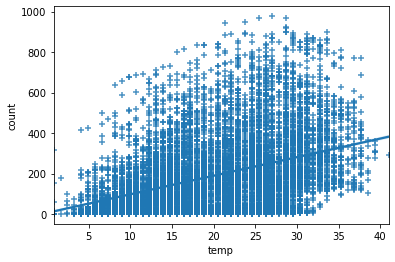

In [17]:
# Plotting with regplot()
sns.regplot(
    data = rent, 
    x = 'temp',
    y = 'count',
    marker = '+'
)
plt.show()

# Evaluation regression with residplot()
 - A residual plot is useful for evaluating the fit of a model 
 - Seaborn supports through residplot function

<AxesSubplot:xlabel='temp', ylabel='count'>

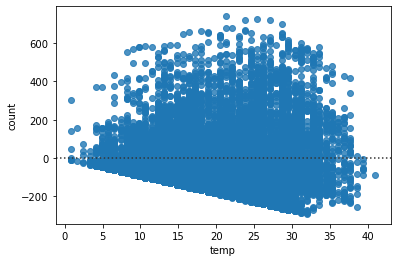

In [19]:
sns.residplot(data = rent, x = 'temp', y = 'count')

## Polynomial regression 
- Seaborn supports polynomial regression using the order parameter 

<AxesSubplot:xlabel='temp', ylabel='count'>

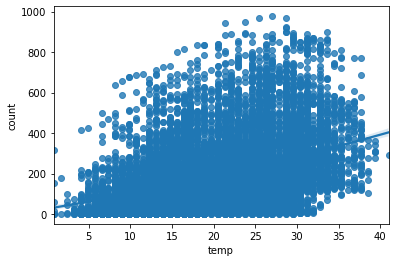

In [20]:
sns.regplot(
    data = rent,
    x = 'temp',
    y = 'count',
    order = 2 # Second order polynomial function for the relationship between temp and rentals
)

<AxesSubplot:xlabel='mth', ylabel='count'>

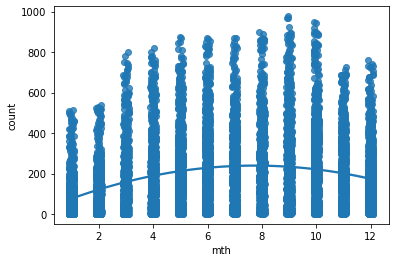

In [32]:
# Categorical values 
rent['datetime'] = pd.to_datetime(rent['datetime'])
rent['mth'] = rent['datetime'].dt.month

sns.regplot(
    data = rent, 
    x = 'mth',
    y = 'count',
    x_jitter= .1,
    order = 2
)

## Estimators 
- In some cases, an x_estimator can be useful for highlighting trends

<AxesSubplot:xlabel='mth', ylabel='count'>

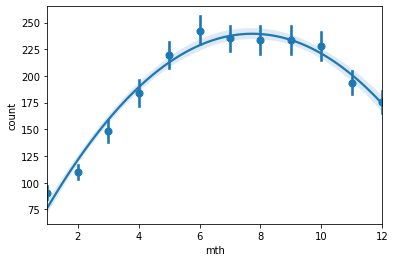

In [33]:
sns.regplot(
    data = rent, 
    x = 'mth',
    y = 'count',
    x_estimator= np.mean,
    order = 2
)

## Binning the data 
- x_bins can be used to divide the data into discrete bins
- The regression line is still fit against all the data
- x_bins can be useful to break the percentages into categories in order to summarize and understand the data

<AxesSubplot:xlabel='temp', ylabel='count'>

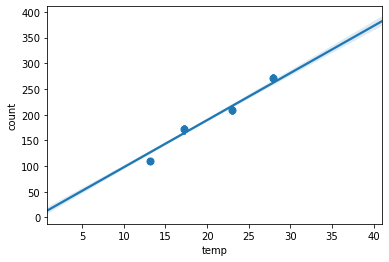

In [34]:
sns.regplot(
    data = rent,
    x = 'temp',
    y = 'count',
    x_bins = 4
)

## Matrix Plots
 - The final category of plots we will discuss in the section are matrix plots.
 - The heatmap is the most common type of matrix plot and can be easily created by Seaborn 
 - Seaborn's heatmap() function requires data to be in a grid format 
 - pandas crosstab() is frequently used to manipulate the data

In [37]:
## Look at the bicycle data to see how rentals vary by day of the week and month
rent['weekday'] = rent['datetime'].dt.dayofweek
df_crosstab = pd.crosstab(
    rent['mth'], 
    rent['weekday'],
    values = rent['count'],aggfunc='mean').round(0)

weekday,0,1,2,3,4,5,6
mth,,,,,,,
1,73.0,97.0,88.0,115.0,109.0,85.0,76.0
2,114.0,110.0,118.0,114.0,131.0,93.0,87.0
3,158.0,133.0,147.0,152.0,136.0,162.0,147.0
4,196.0,183.0,173.0,207.0,164.0,165.0,196.0
5,182.0,208.0,201.0,238.0,247.0,256.0,206.0
6,236.0,238.0,234.0,229.0,238.0,269.0,245.0
7,238.0,231.0,245.0,250.0,239.0,235.0,216.0
8,224.0,235.0,247.0,245.0,236.0,245.0,201.0
9,231.0,220.0,245.0,207.0,238.0,244.0,247.0


<AxesSubplot:xlabel='weekday', ylabel='mth'>

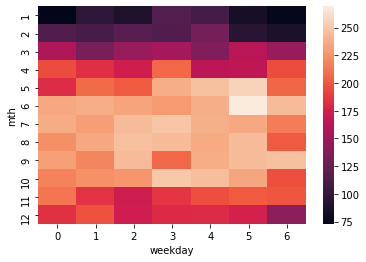

In [38]:
# The heatmap trranslates the numerical values in the matrix into a color coded grid
sns.heatmap(
    pd.crosstab(
    rent['mth'], 
    rent['weekday'],
    values = rent['count'],aggfunc='mean')
)

<AxesSubplot:xlabel='weekday', ylabel='mth'>

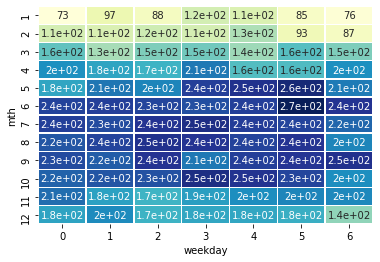

In [41]:
## fmt = "d" -> ensures that the results are displayed as integers
sns.heatmap(
    df_crosstab, 
    annot = True,   # Turn on annotations in the indivudual cells
    cmap = "YlGnBu", # custom cmap of Yellow Green Blue to change the shading we use
    cbar = False,    # color bar is not displayed 
    linewidths = .5  # Putting linewidths puts some small spacing between the cells so that the values are simpler to view 
)

## Centering a heatmap
- Seaborn support centering the heatmap colors on a specific value

<AxesSubplot:xlabel='weekday', ylabel='mth'>

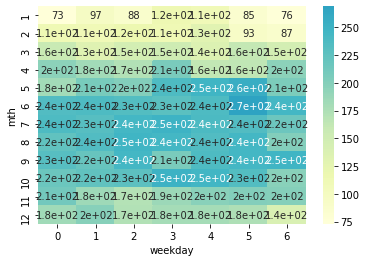

In [42]:
sns.heatmap(
    df_crosstab, 
    annot = True,   
    cmap = "YlGnBu", 
    cbar = True,  
    center = df_crosstab.loc[9, 6] 
)

## Plotting a correlation matrix 
- Pandas corr function calculates correlations between columns in a dataframe 
- The output can be converted to a heatmap with seaborn 

<AxesSubplot:>

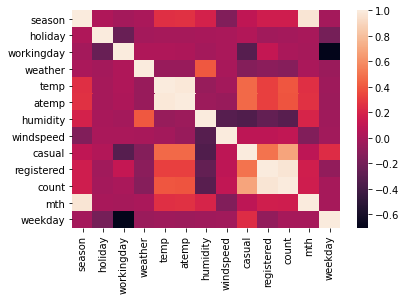

In [43]:
sns.heatmap(rent.corr())

## Using FacetGrid, factorplot, and lmplot
- Tidy data 
    - Seaborn's grid plots require data in "tidy format"
    - One observation per row of data
- FacetGrid
    - The FacetGrid is foundational for many data aware grids
    - It allows the user to control how data is distributed across columns, row and hue
    - Once a FacetGrid is created, the plot type must be mapped to the grid

## FacetGrid Categorical Example 

In [ ]:
# The first step is to set up FacetGrid() with the column defined as the hightest degree awarded by the school
g = sns.FacetGrid (df, col = "HIGHDEG")
g.map(sns.boxplot, 'Tuition', order =['1', '2', '3' , '4'])

## factorplot()
 - the factorplot is a simpler way to use a FacetGrid for categorical data 
 - Combines the facetting and mapping process into 1 function 

In [ ]:
sns.factorplot(
    x = "Tuition",
    data = tui, 
    col = "HIGHDEG",
    kind = 'box'
)

## FacetGrid for regression 
 - FacetGrid() cabn also be used for scatter or regression plots 

In [ ]:
g = sns.FacetGrid(df, col = "HIGHDEG")
g.map(plt.scatter, 'Tuition', 'SAT_AVG_ALL')

## lmplot 
- The lmplot() function is similar to the factorplot() function
- The lmplot is used to plot scatter plots with regression lines on FacetGrid objects.

In [ ]:
sns.lmplot(
    data = df, 
    x = 'Tuition', 
    y = "SAT_AVG_ALL",
    col = "HIGHDEG",
    fit_reg = False
)

In [ ]:
sns.lmplot(
    data = df, 
    x = 'Tuition', 
    y = "SAT_AVG_ALL",
    col = "HIGHDEG",
    row = 'REGION'
)

## Building a FacetGrid 

In [ ]:
# Create FacetGrid with Degree_Type and specify the order of the rows using row_order
g2 = sns.FacetGrid(df, 
             row="Degree_Type",
             row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

# Map a pointplot of SAT_AVG_ALL onto the grid
g2.map(sns.pointplot, 'SAT_AVG_ALL')

# Show the plot
plt.show()
plt.clf()

## Using PairGrid and pairplot
- Useful tools for looking at the relationships between pairs of variables
- We only define the columns of data we want to compare 
- PairGrid shows pairwise relationships between two data elements
- We do not define the row and column parameters to the grid. Instead we define the variables. 

In [ ]:
# Need to create the grid, then map a plot type to the grid
g = sns.PairGrid(df, vars = ["Fair_Mrkt_Rent", "Median_Income"])
g = g.map(plt.scatter)

In [ ]:
# Customizing the PairGrid diagonals 
g = sns.PairGrid(df, vars = ["Fair_Mrkt_Rent", "Median_Income"])
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)

## Pairplot
- Pairplot is a shortcut for PairGrid
- It plots a regression line 

In [ ]:
sns.pairplot(
    df, 
    vars = ["Fair_Mrkt_Rent", "Median_Income"],
    kind = 'reg',
    diag_kind = 'hist'
)

In [ ]:
## Customizing a pairplot
sns.pairplot(
    df.query('BEDRMS <3'),
    vars = ["Fair_Mrkt_Rent", "Median_Income", "UTILITY"],
    hue = 'BEDRMS',
    palette = 'husl',
    plot_kws={'alpha': 0.5}
)

In [ ]:
# Build a pairplot with different x and y variables
sns.pairplot(data=df,
        x_vars=["fatal_collisions_speeding", "fatal_collisions_alc"],
        y_vars=['premiums', 'insurance_losses'],
        kind='scatter',
        hue='Region',
        palette='husl')

plt.show()

In [ ]:
# plot relationships between insurance_losses and premiums
sns.pairplot(data=df,
             vars=["insurance_losses", "premiums"],
             kind='reg',
             palette='BrBG',
             diag_kind = 'kde',
             hue='Region')

plt.show()
plt.clf()

## Using JointGrid and jointplot
- A jointGrid() allows us to compare the distribution of data between two variables

In [ ]:
# Basic JointGrid
g = sns.JointGrid(data = df, x = "Tuition", y = "ADM_RATE_ALL")
g.plot(sns.regplot, sns.distplot)

In [ ]:
#Advanced JointGrid
g = sns.JointGrid(data = df, x = "Tuition", y = "ADM_RATE_ALL")
g = g.plot_joint(sns.kdeplot)
g = g.plot_marginals(sns.kdeplot, shade = True)
g = g.annotate(stats.pearsonr)

In [ ]:
# Jointploy()
sns.joinplot(data=df, x="Tuition", y ="ADM_RATE_ALL", kind = 'hex')

In [ ]:
# Customizing a jointplot
g = (sns.jointplot(
    x = "tuition",
    y= "ADM_RATE_ALL",
    kind = 'scatter',
    xlim=(0, 25000),
    marginal_kws = dist(
        bins = 15,
        rug= True),
    data = df.query('UG < 2500 & Ownership == "Public"'))
    .plot_joint(sns.kdeplot))